In [1]:
from feature_process import *
from data_process import *
from pose_cluster import *

In [2]:
feat_type = 'bscwtH'
model_type = 'svm'
add_cluster = 'Y'
classes = 3

basal: 41  ,pain: 15  sng: 14  pH7.4: 12
pose clustering...
motions num:  50
bad motions: 20


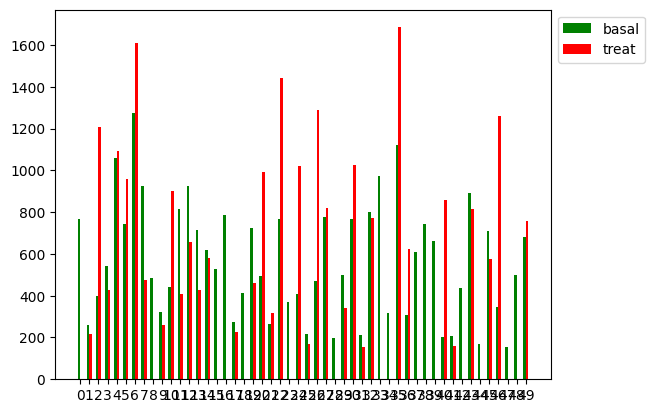

In [3]:
if feat_type == 'frame':
    dlc_root = r'..\final_data\mix_landmark5'
    dlc = DataSet(dlc_root)
else:
    dlc_root = r'..\final_data\mix_landmark7'
    if feat_type[-1]=='H':
        bs_root = r'..\final_data\mix_bsoidfeat'
    else:
        bs_root = r'..\final_data\mix_bsoidfeat2'
    dlc = DataSet(dlc_root, bsoid=bs_root)
dlc.generate_feature(feat_type=feat_type)

if add_cluster == 'Y':
    print('pose clustering...')
    dlc.pose_cls(sel=['Cap','Capbasal'], sel_num=20, embed=False, k=50, cls_type='km', clf_type='svm')

In [4]:
res_te = []
res_tt = []
res_te0 = []
res_tt0 = []

for i in range(10):
    dlc.generate_train_test(split=0.1, motion_del=False, k=i+1)

    # model
    x_train = np.concatenate(dlc.data['x_train'])
    y_train = np.concatenate(dlc.data['y_train'])
    model = Analysis(model_type=model_type, classes=classes)
    model.train(x_train,y_train)
    x_test = np.concatenate(dlc.data['x_test'])
    y_test = np.concatenate(dlc.data['y_test'])
    res_te.append(model.analysis2(x_test, y_test))
    # res_te0.append(model.analysis(x_test, y_test))
    x_val = np.concatenate(dlc.data['x_val'])
    y_val = np.concatenate(dlc.data['y_val'])
    res_tt.append(model.analysis2(x_val, y_val))
    # res_tt0.append(model.analysis(x_val, y_val))

In [5]:
np.savetxt(r'C:\Users\x\Desktop\final_data/analysis_SPDR/(YSYY_SVM)res_te.csv', np.array(res_te), delimiter=',', fmt='%.2f')
np.savetxt(r'C:\Users\x\Desktop\final_data/analysis_SPDR/(YSYY_SVM)res_tt.csv', np.array(res_tt), delimiter=',', fmt='%.2f')

In [7]:
joblib.dump(model.model, r'C:\Users\x\Desktop\final_data/analysis_SPDR/(YSYY_SVM)model.sav')

['C:\\Users\\x\\Desktop\\final_data/analysis_SPDR/(YSYY_SVM)model.sav']